In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import sys
sys.path.append('../')

In [3]:
from propagator.constants import  *
from propagator.propagator import w_h_effect
from numpy import pi, exp, tanh, sign

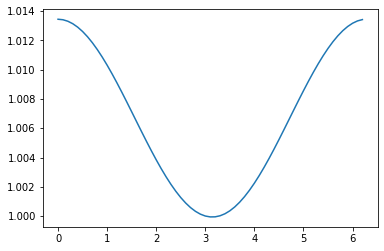

In [10]:
w_speed = 1 #in km/h
angle_to = 0
dh = 0
cellsize= 20
dist = 1
v = 3 # in m/min

W_DIR = np.arange(0, np.pi*2, 0.1)
V_WH = []
for w_dir in W_DIR:
    v_wh = w_h_effect(angle_to, w_speed, w_dir, dh, dist)

    
    V_WH.append(v_wh)
    
plt.plot(W_DIR, V_WH)        

Contributo del vento
---------------------

C:\Users\utente\Miniconda3\envs\propagator_venv\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


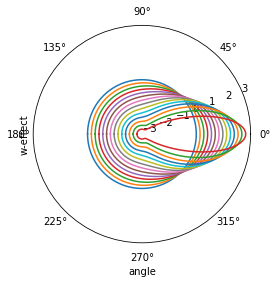

In [4]:
b = np.arange(-pi, pi, 0.01)
wspeeds = np.arange(0, 70, 5)
for wspeed in wspeeds:
    ws = wspeed
    w = 3*(wspeed * np.exp(-(b**2) / (1 + (-0.5 * (ws / 50)**2))) - (ws / 2)) / 35
    ax = plt.subplot(111, projection='polar')
    ax.plot(b, w)    
    

plt.xlabel('angle')
plt.ylabel('w-effect')
plt.grid()

Contributo dello slope
------------------

Text(0, 0.5, 'h-effect')

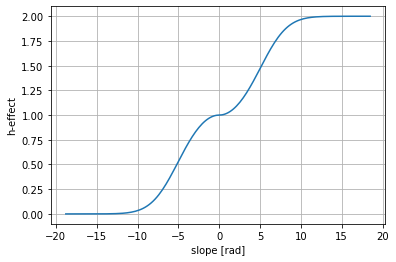

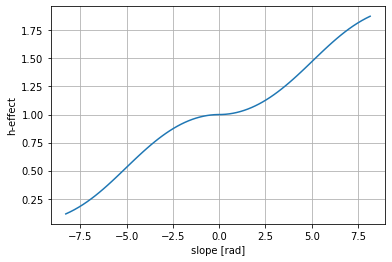

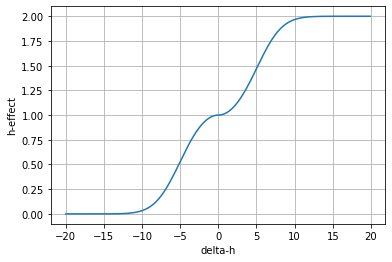

In [5]:
teta_s = np.arange(-6*pi/25,6*pi/25,0.01) #slope angle [rad]

dh = cellsize * dist * np.tan(teta_s)
h = (1 + tanh((dh / 7)**2. * sign(dh)))

plt.plot(dh, h)
plt.grid()
plt.xlabel('slope [rad]')
plt.ylabel('h-effect')

#più nel dettaglio....
teta_s2 = np.arange(-pi/8,pi/8,0.01) #slope angle [rad]

dh2 = cellsize * dist * np.tan(teta_s2)
h2 = (1 + tanh((dh2 / 7)**2. * sign(dh2)))

plt.figure()
plt.plot(dh2, h2)
plt.grid()
plt.xlabel('slope [rad]')
plt.ylabel('h-effect')

#se guardo come varia in funzione di dh
dh3 = np.arange(-20,20,0.1)
h3 = (1 + tanh((dh3 / 7)**2. * sign(dh3)))

plt.figure()
plt.plot(dh3, h3)
plt.grid()
plt.xlabel('delta-h')
plt.ylabel('h-effect')

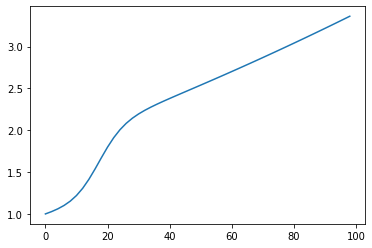

In [10]:
w_dir = 0
angle_to = 0
D1 = 0.5
D2 = 1.4
D3 = 8.2
D4 = 2.0
D5 = 50.0
A = 1 - ((D1 * (D2 * np.tanh((0 / D3) - D4))) + (0 / D5))

w_speed =np.arange(0,100,2)

w_effect_module = (A + (D1 * (D2 * np.tanh((w_speed / D3) - D4))) + (w_speed / D5))
a = (w_effect_module - 1) / 4
w_effect_on_direction = (a + 1) * (1 - a ** 2) / (1 - a * np.cos(w_dir - angle_to))

plt.figure()
plt.plot(w_speed, w_effect_on_direction)

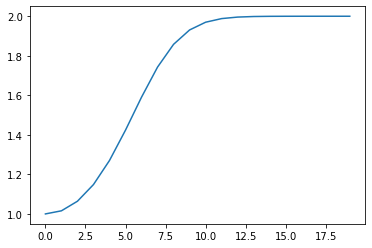

In [6]:


#w_effect_module = (A + (D1 * (D2 * np.tanh((w_speed / D3) - D4))) + (w_speed / D5))
#a = (w_effect_module - 1) / 4
#w_effect_on_direction = (a + 1) * (1 - a ** 2) / (1 - a * np.cos(normalize(w_dir - angle_to)))
dh = np.arange(0,20,1)
slope = dh/(cellsize*dist)
h_effect = 2**((tanh((slope * 3) ** 2. * sign(slope))))
plt.figure()
plt.plot(dh, h_effect)
#w_h = h_effect * w_effect_on_direction